In [1]:
import os
import cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 读取文件夹内的所有文件的路径
def read_file_name(file_dir):
    list_path =[]  # 文件路径
    list_name = []  # 文件名
    for root, dirs, files in os.walk(file_dir):
        """
        print(root)  # 当前目录路径
        print(dirs)  # 当前路径下所有文件夹
        print(files)  # 当前路径下所有文件
       """
        path = root
        if len(dirs) == 0:  # 该目录下不存在文件夹
            for file in files:
                path1 = path + '//' + file
                # print(path1)
                list_path.append(path1)
                list_name.append(file)
        else:  # 该目录下存在文件夹
            for dir1 in dirs:
                path = path + '//' + dir1
                for file in files:
                    path1 = path + '//' + file
                    # print(path1)
                    list_path.append(path1)
                    list_name.append(file)
    return list_path, list_name


# 读取所有图片的路径




In [51]:
def get_red_point(img):
    grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 从RGB色彩空间转换到HSV色彩空间
    grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

    # H、S、V范围一：
    lower1 = np.array([0,43,46])
    upper1 = np.array([10,255,255])
    mask1 = cv2.inRange(grid_HSV, lower1, upper1)       # mask1 为二值图像
    res1 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask1)

    # H、S、V范围二：
    lower2 = np.array([156,43,46])
    upper2 = np.array([180,255,255])
    mask2 = cv2.inRange(grid_HSV, lower2, upper2)
    res2 = cv2.bitwise_and(grid_RGB,grid_RGB, mask=mask2)

    # 将两个二值图像结果 相加
    mask3 = mask1 + mask2
    return mask3
def get_red_contour(img):
    # cv2.threshold：参数1是源图片, 参数2是阈值, 参数3是填充色, 参数4是阈值类型
    ret, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
    black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)
    num_count=0
    coordinate=[]
    contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if (cv2.contourArea(cnt) <100 ):
            continue
        epsilon = 0.01 * cv2.arcLength(cnt,True)
        # cv2.approxPolyDP：参数1是轮廓，参数2是epsilon值，表源轮廓与近似多边形的最大差值，参数3是布尔标记，表示多边形是否闭合
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        hull = cv2.convexHull(cnt) # 获取处理过的轮廓信息
        #
        x, y, w, h = cv2.boundingRect(cnt)
        if(w<60):
            cv2.drawContours(black, [cnt], -1, (0, 255, 0), thickness=-1)
            num_count=num_count+1
            coordinate.append([y,x,w,h])
    #print(num_count)
    return black,coordinate
def get_main_contour(img):
    # cv2.threshold：参数1是源图片, 参数2是阈值, 参数3是填充色, 参数4是阈值类型
    ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 127, 255, cv2.THRESH_BINARY)
    black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)

    contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if (cv2.contourArea(cnt) < 500 ):
            continue
        epsilon = 0.01 * cv2.arcLength(cnt,True)
        # cv2.approxPolyDP：参数1是轮廓，参数2是epsilon值，表源轮廓与近似多边形的最大差值，参数3是布尔标记，表示多边形是否闭合
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        hull = cv2.convexHull(cnt) # 获取处理过的轮廓信息
        cv2.drawContours(black, [cnt], -1, (0, 255, 0), thickness=-1)
        #cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
        #cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
    kernel = np.ones(shape=[6,6],dtype=np.uint8)  # 通过shape=[3,3]可以改变处理效果
    black = cv2.erode(black,kernel=kernel)
    return black
def findcore(coordinates):
    
    cores=[]
    for coordinate in coordinates:
        x = coordinate[1]+coordinate[2]/2
        y = coordinate[0]+coordinate[3]/2
        cores.append([x,y])

    return np.array(cores)

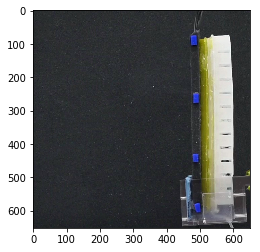

In [52]:
example_path='cut_video/armframe//1.jpg'
example_img=cv2.imread(example_path)
aa=np.array(example_img)
plt.imshow(aa)

##  获取像素点位

In [53]:
example_path='cut_video/armframe//233.jpg'
example_img=cv2.imread(example_path)
example_img=cv2.resize(example_img,(300,300))
redpart=get_red_point(example_img)
redcontour,coord=get_red_contour(redpart)
main_contour=get_main_contour(example_img)
final_img=main_contour+redcontour


In [54]:
coord
core=findcore(coord)

In [55]:
core

array([[223. , 276. ],
       [220.5, 204. ],
       [204.5, 124. ],
       [170. ,  53.5]])

In [56]:
coord=np.array(coord)
coord=coord.flatten()
print(coord)

[262 212  22  28 197 214  13  14 116 198  13  16  45 162  16  17]


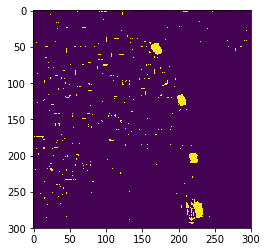

In [57]:
plt.imshow(redpart)

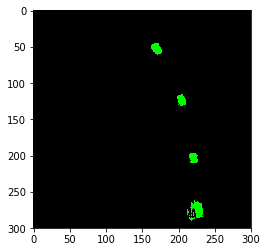

In [58]:
plt.imshow(redcontour)

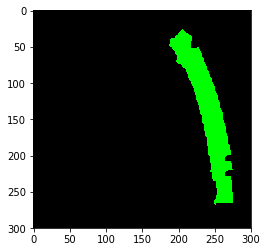

In [59]:
plt.imshow(main_contour)

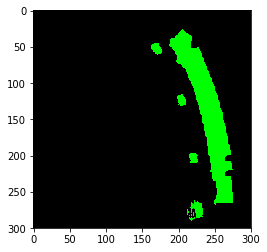

In [60]:
kernel = np.ones(shape=[5,5],dtype=np.uint8)  # 通过shape=[3,3]可以改变处理效果

    # 腐蚀，由多变少，边界容易被腐蚀,去除噪声
main_contour = cv2.erode(main_contour,kernel=kernel)
plt.imshow(final_img)

In [61]:
#f'姓名：{name} 年龄：{age} 性别：{gender}'
name=f'/Users/kriny/Desktop/master/final_project/data_process/cut_video/armframe//{1}.jpg'


In [62]:
no_use=np.random.randint(low=1, high=1315, size=500, dtype='l')
no_use.shape

(500,)

In [63]:
path_original = "cut_video/armframe"  # 原文件夹
path_target = "cut_video/contours"  # 目标文件夹
file_path, file_name = read_file_name(path_original)
print(file_path[1])
cores=[]
nums=0
for num in range(1,1315):
    # 读取图片
    if num in no_use:
        continue
    name=f'cut_video/armframe/{num}.jpg'
    #print("当前是第%s",name)
    example_img=cv2.imread(name)
    #example_img=cv2.resize(example_img,(300,300))
    redpart=get_red_point(example_img)
    redcontour,coord=get_red_contour(redpart)
    core=findcore(coord)
    core=core.flatten()
    cores.append(core)
    main_contour=get_main_contour(example_img)
    final_img=main_contour+redcontour
    path_save = f'{path_target}/{num}.jpg'
    cv2.imwrite(path_save,final_img)
    nums=nums+1
    
print("执行结束。生成照片个数为：",nums)


cut_video/armframe//10.jpg


error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [84]:
nums

905

In [85]:
cores=np.array(cores)
cores.shape

(905, 8)

In [86]:
np.savetxt( "marker_position.csv", cores, delimiter="," )